<a href="https://colab.research.google.com/github/adarsh1github1/Iris-classification/blob/master/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


In [0]:
#import data
data=pd.read_csv(url,names=['f1','f2','f3','f4','f5'])

In [4]:
data

,f1,f2,f3,f4,f5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data["f5"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: f5, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


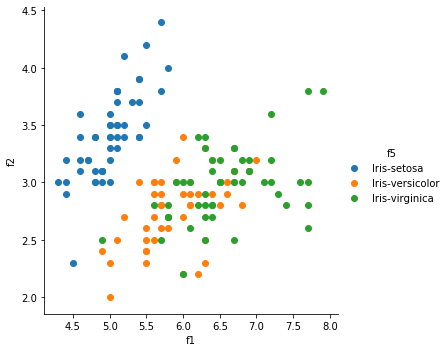

In [6]:
sns.FacetGrid(data, hue="f5", size=5) \
   .map(plt.scatter, "f1", "f2") \
   .add_legend()

In [0]:

#map data into arrays
s=np.asarray([1,0,0])
ve=np.asarray([0,1,0])
vi=np.asarray([0,0,1])
data['f5'] = data['f5'].map({'Iris-setosa': s, 'Iris-versicolor': ve,'Iris-virginica':vi})

In [8]:
data

,f1,f2,f3,f4,f5
0,5.1,3.5,1.4,0.2,"[1, 0, 0]"
1,4.9,3.0,1.4,0.2,"[1, 0, 0]"
2,4.7,3.2,1.3,0.2,"[1, 0, 0]"
3,4.6,3.1,1.5,0.2,"[1, 0, 0]"
4,5.0,3.6,1.4,0.2,"[1, 0, 0]"
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,"[0, 0, 1]"
146,6.3,2.5,5.0,1.9,"[0, 0, 1]"
147,6.5,3.0,5.2,2.0,"[0, 0, 1]"
148,6.2,3.4,5.4,2.3,"[0, 0, 1]"


In [0]:
#shuffle the data
data=data.iloc[np.random.permutation(len(data))]

In [0]:
data=data.reset_index(drop=True)


In [11]:
data

,f1,f2,f3,f4,f5
0,5.7,4.4,1.5,0.4,"[1, 0, 0]"
1,5.1,3.5,1.4,0.2,"[1, 0, 0]"
2,5.0,3.4,1.6,0.4,"[1, 0, 0]"
3,5.7,2.6,3.5,1.0,"[0, 1, 0]"
4,6.8,2.8,4.8,1.4,"[0, 1, 0]"
...,...,...,...,...,...
145,7.4,2.8,6.1,1.9,"[0, 0, 1]"
146,4.4,2.9,1.4,0.2,"[1, 0, 0]"
147,7.7,2.6,6.9,2.3,"[0, 0, 1]"
148,6.1,2.8,4.0,1.3,"[0, 1, 0]"


In [12]:
#training data
x_input=data.ix[0:105,['f1','f2','f3','f4']]
temp=data['f5']
y_input=temp[0:106]
#test data
x_test=data.ix[106:149,['f1','f2','f3','f4']]
y_test=temp[106:150]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-depr

In [0]:

#placeholders and variables. input has 4 features and output has 3 classes
x=tf.placeholder(tf.float32,shape=[None,4])
y_=tf.placeholder(tf.float32,shape=[None, 3])
#weight and bias connecta 4 input to 3 output
w=tf.Variable(tf.zeros([4,3]))
b=tf.Variable(tf.zeros([3]))

In [0]:
#softmax model -multiclass classification
y = tf.nn.softmax(tf.matmul(x,w) + b)


In [0]:
#loss function - mean of the sum of y* predicted value
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))

In [0]:
#optimimzer
train_step=tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

In [0]:
#accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [28]:
#session parameters
sess = tf.InteractiveSession()
#initialinsing variables
init = tf.initialize_all_variables()
sess.run(init)
#number of iteration
epoch= 2000

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [33]:
for step in range(epoch):
   _, c=sess.run([train_step,cross_entropy], feed_dict={x: x_input, y_:[t for t in y_input.as_matrix()]})
   if step%500==0 :
       print (c)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1.0986122
0.14557269
0.08471193
0.06482877


In [37]:

#random testing at Sn.130
a=data.ix[130,['f1','f2','f3','f4']]
b=a.values.reshape(1,4)
largest = sess.run(tf.arg_max(y,1), feed_dict={x: b})[0]
if largest==0:
    print ("flower is :Iris-setosa")
elif largest==1:
    print ("flower is :Iris-versicolor")
else :
    print ("flower is :Iris-virginica")

flower is :Iris-virginica


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


In [41]:
print(sess.run(accuracy,feed_dict={x: x_test, y_:[t for t in y_test.as_matrix()]}))

0.97727275


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
